In [2]:
from qiskit import QuantumRegister,QuantumCircuit,ClassicalRegister,transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import GroverOperator
from qiskit.visualization import plot_histogram

In [3]:
def puzzle():
    circuit = QuantumCircuit(3,3)
    circuit.cx(0,1)
    circuit.cx(1,2)
    circuit.h(1)
    circuit.h(2)
    circuit.h(0)
    orcale = QuantumCircuit(3)
    orcale.z(0)
    orcale_gate = orcale.to_gate(label = "Oracle")
    groveoperator = GroverOperator(orcale)
    circuit.append(groveoperator,range(3))
    circuit.measure(range(3),range(3))
    return circuit

In [4]:
circuit = puzzle()

C:\Users\HP\AppData\Local\Temp\ipykernel_265424\4250828470.py:11: DeprecationWarning: The class ``qiskit.circuit.library.grover_operator.GroverOperator`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use qiskit.circuit.library.grover_operator instead.
  groveoperator = GroverOperator(orcale)


In [5]:
backend = AerSimulator()
output = transpile(circuit,backend)
output = backend.run(output,shots=100).result()
output.get_counts()

{'011': 18,
 '001': 12,
 '111': 16,
 '101': 15,
 '110': 17,
 '000': 9,
 '010': 11,
 '100': 2}

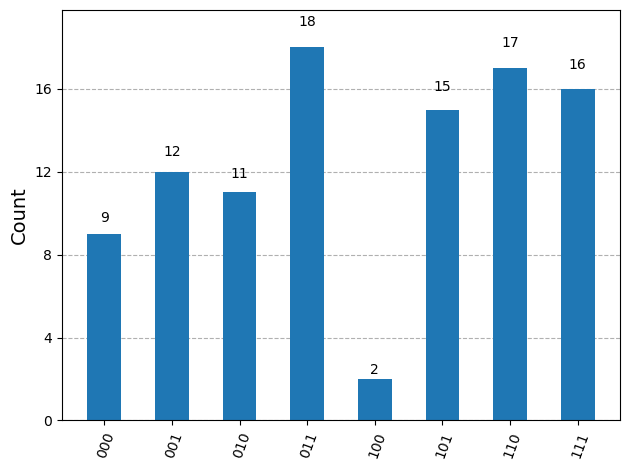

In [6]:
plot_histogram(output.get_counts())